## Importing libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## importing data and data exploration:

In [4]:
h_data = pd.read_csv("heart.csv")
h_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
h_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### exploring unique values of each columns.

In [18]:
print("cp column unique values are: ",h_data["cp"].unique())
## print("trtbps column unique values are: ",h_data["trtbps"].unique())
## excluded the above column as it have many different values
## print("chol column unique values are: ",h_data["chol"].unique())
## excluded the above column as it have many different values
print("fbs column unique values are: ",h_data["fbs"].unique())
print("restecg column unique values are: ",h_data["restecg"].unique())
##print("thatachh column unique values are: ",h_data["thalachh"].unique())
## excluded the above column as it have many different values
print("exng column unique values are: ",h_data["exng"].unique())
print("slp column unique values are: ",h_data["slp"].unique())
print("caa column unique values are: ",h_data["caa"].unique())
print("thall column unique values are: ",h_data["thall"].unique())
print("output column unique values are: ",h_data["output"].unique())

cp column unique values are:  [3 2 1 0]
fbs column unique values are:  [1 0]
restecg column unique values are:  [0 1 2]
exng column unique values are:  [0 1]
slp column unique values are:  [0 2 1]
caa column unique values are:  [0 2 1 3 4]
thall column unique values are:  [1 2 3 0]
output column unique values are:  [1 0]


## Data Analysis:
## ==============
### 14 columns all have non null values, and all are non-string values which is good for analysis.
### Data meaning:(Columns Dictionary)
### age >> how old are the patients.
### sex >> (1 = male, 0 = female).
### cp >> chest pain type. It has 4 types marked 0, 1, 2, or 3. each has a type name for the pain.
### trtbps >> resting blood pressure. anything above 130-140 is typically cause for concern.
### chol >> serum cholestoral. above 200 is cause for concern.
### fbs >> fasting blood sugar (1 = true, 0 false).
### rest_ecg >> 3 levels: 0, 1, and 2.
### thalach >> maximum heart rate achieved.
### exang >> exercise induced angina (1 = yes; 0 = no).
### oldpeak >> ration indicates how heart responds to exercises.
### slp >> slope of peak exercises (0, 1, and 2).
### caa >> number of major vessels: 5 sets 0, 1, 2, 3, and 4
### thal >> thalium stress result, 1, 2, 3, and 0
### output >> It is our target (1 = have disease, 0 = don't have disease)

In [23]:
target = h_data["output"]
target.value_counts()

1    165
0    138
Name: output, dtype: int64

Text(0.5, 1.0, 'Heart diesease count')

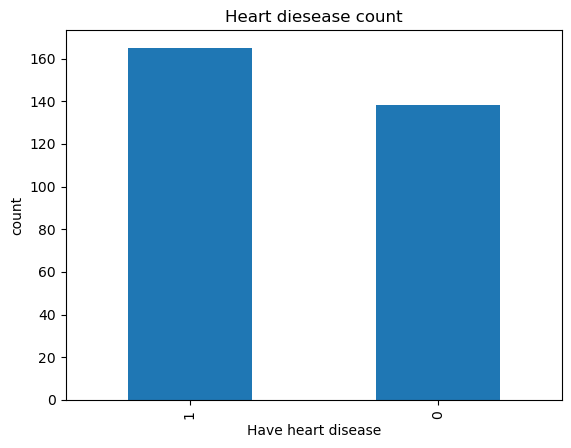

In [25]:
target.value_counts().plot(kind='bar');
plt.xlabel("Have heart disease")
plt.ylabel("count")
plt.title("Heart diesease count")

In [26]:
# Checking for messing values
h_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### No null data verification ^^^

### Analyzing columns or features against each other and relations between them:

In [28]:
## After exploring unique values of columns:
## We have the following columns as columns that can be categorized and other columns as continuous:
col_categ = h_data[["cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "sex"]]
col_contin = h_data[["age", "trtbps", "chol", "thalachh", "oldpeak"]]
print(col_categ)
print(col_contin)

     cp  fbs  restecg  exng  slp  caa  thall  sex
0     3    1        0     0    0    0      1    1
1     2    0        1     0    0    0      2    1
2     1    0        0     0    2    0      2    0
3     1    0        1     0    2    0      2    1
4     0    0        1     1    2    0      2    0
..   ..  ...      ...   ...  ...  ...    ...  ...
298   0    0        1     1    1    0      3    0
299   3    0        1     0    1    0      3    1
300   0    1        1     0    1    2      3    1
301   0    0        1     1    1    1      3    1
302   1    0        0     0    1    1      2    0

[303 rows x 8 columns]
     age  trtbps  chol  thalachh  oldpeak
0     63     145   233       150      2.3
1     37     130   250       187      3.5
2     41     130   204       172      1.4
3     56     120   236       178      0.8
4     57     120   354       163      0.6
..   ...     ...   ...       ...      ...
298   57     140   241       123      0.2
299   45     110   264       132      1.

### Let's now check who have heart disease regarding categories we sliced:

#### Category #1: sex:

In [29]:
have_disease_sex = h_data.loc[h_data['output'] == 1, 'sex'].value_counts()
no_disease_sex = h_data.loc[h_data['output'] == 0, 'sex'].value_counts()

Text(0.5, 1.0, 'Heart diesease count according to sex')

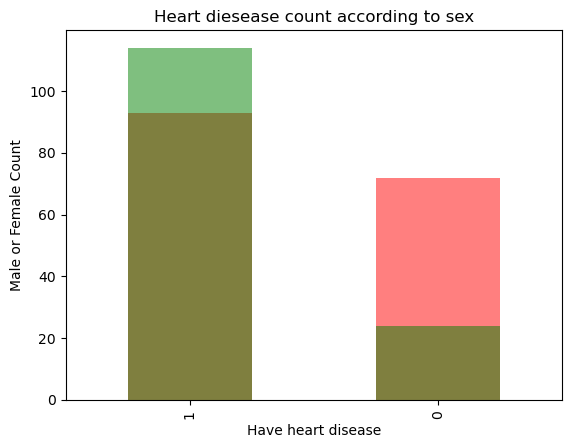

In [35]:
have_disease_sex.plot(kind = "bar", color = "red", alpha = 0.5)
no_disease_sex.plot(kind = "bar", color = "green", alpha = 0.5)
plt.xlabel("Have heart disease")
plt.ylabel("Male or Female Count")
plt.title("Heart diesease count according to sex")

#### category#2: Chest Pain Type::
#### 0: Typical angina
#### 1: Atypical angina
#### 2: Non-anginal pain
#### 3: Asymptomatic

In [44]:
have_disease_cp = h_data.loc[h_data['output'] == 1, 'cp'].value_counts()
no_disease_cp = h_data.loc[h_data['output'] == 0, 'cp'].value_counts()

Text(0.5, 1.0, 'Heart diesease count according to Chest Pain Type')

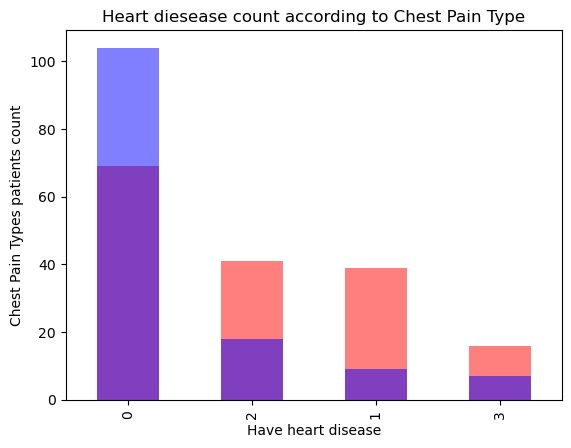

In [45]:
have_disease_cp.plot(kind = "bar", color = "red", alpha = 0.5)
no_disease_cp.plot(kind = "bar", color = "blue", alpha = 0.5)
plt.xlabel("Have heart disease")
plt.ylabel("Chest Pain Types patients count")
plt.title("Heart diesease count according to Chest Pain Type")

#### category#3: Fast Blood Sugar:
#### 0: No diabetes
#### 1: Have diabetes

In [46]:
have_disease_fbs = h_data.loc[h_data['output'] == 1, 'fbs'].value_counts()
no_disease_fbs = h_data.loc[h_data['output'] == 0, 'fbs'].value_counts()

Text(0.5, 1.0, 'Heart diesease count according to Fast Blood Sugar')

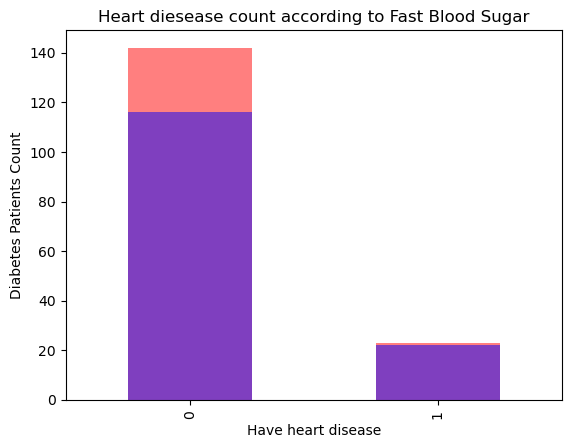

In [47]:
have_disease_fbs.plot(kind = "bar", color = "red", alpha = 0.5)
no_disease_fbs.plot(kind = "bar", color = "blue", alpha = 0.5)
plt.xlabel("Have heart disease")
plt.ylabel("Diabetes Patients Count")
plt.title("Heart diesease count according to Fast Blood Sugar")

### Let's now check who have heart disease regarding continuous values columns we sliced:

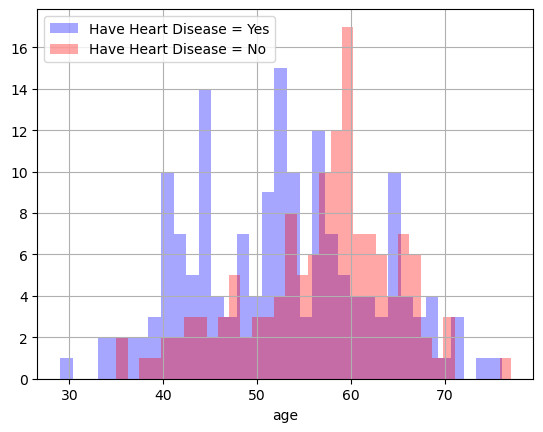

In [61]:
have_disease_age = h_data.loc[h_data['output'] == 1, 'age']
no_disease_age = h_data.loc[h_data['output'] == 0, 'age']
##############################PLOTS##########################################
have_disease_age.hist(bins=35, color='blue', label='Have Heart Disease = Yes', alpha=0.35)
no_disease_age.hist(bins=35, color='red', label='Have Heart Disease = No', alpha=0.35)
plt.xlabel("age")
plt.legend()

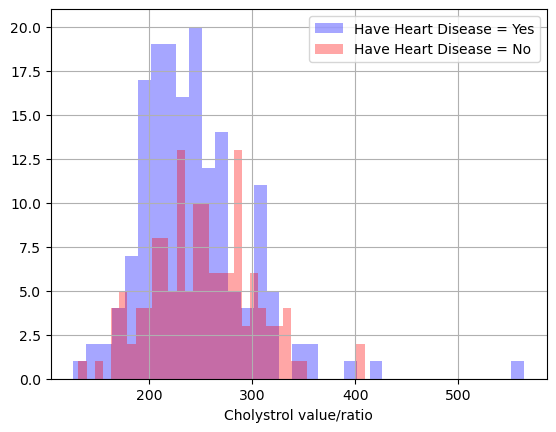

In [63]:
have_disease_chol = h_data.loc[h_data['output'] == 1, 'chol']
no_disease_chol = h_data.loc[h_data['output'] == 0, 'chol']
##############################PLOTS##########################################
have_disease_chol.hist(bins=35, color='blue', label='Have Heart Disease = Yes', alpha=0.35)
no_disease_chol.hist(bins=35, color='red', label='Have Heart Disease = No', alpha=0.35)
plt.xlabel("Cholystrol value/ratio")
plt.legend()

### Correlation matrix and heatmap:

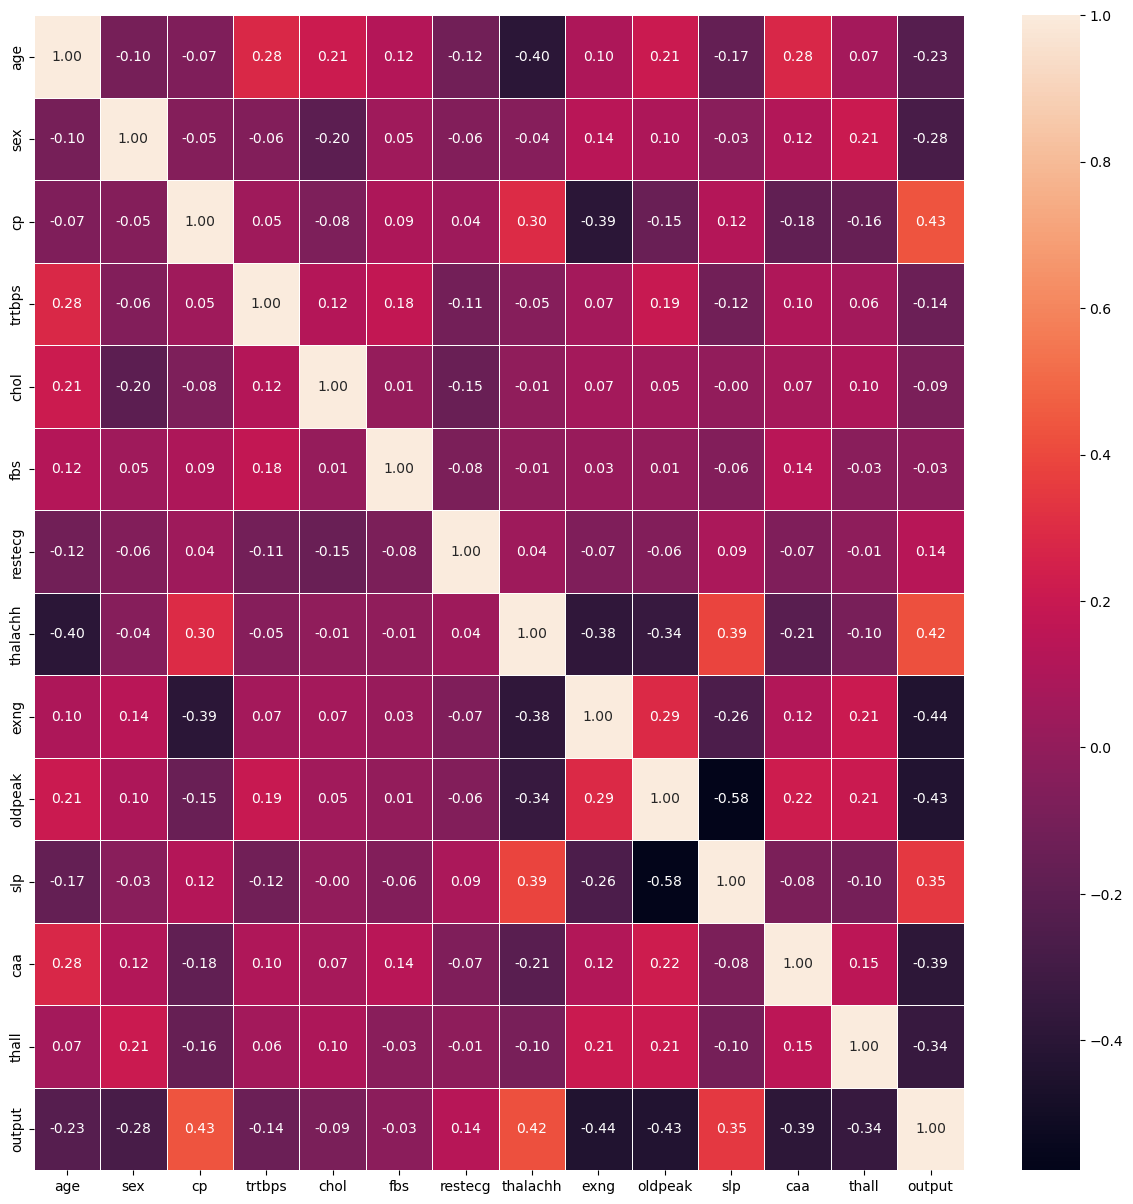

In [69]:
corr_mat = h_data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_mat, annot=True,linewidths=0.5,fmt=".2f")

### scaling or normalizing data to have all columns the same range of values

In [72]:
## columns that need scaling:
col_contin = h_data[["age", "trtbps", "chol", "thalachh", "oldpeak"]]

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
col_contin = std_scaler.fit_transform(col_contin)

In [73]:
col_contin

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [74]:
h_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
## nothing happened in the real data:

In [76]:
h_data[["age", "trtbps", "chol", "thalachh", "oldpeak"]] = std_scaler.fit_transform(h_data[["age", "trtbps", "chol", "thalachh", "oldpeak"]])

In [77]:
h_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [78]:
## now they are scaled

## Building Machine Learning Models:

In [81]:
from sklearn.model_selection import train_test_split
X = h_data.drop('output', axis=1)
y = h_data.output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Trying the KNN:

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# KNN prediction:
knn_pred = knn_model.predict(X_train)
knn_acc_score = accuracy_score(y_train,knn_pred)
knn_conf_mat = confusion_matrix(y_train,knn_pred)
knn_class_report = classification_report(y_train,knn_pred)

D:\ProgramfilesD\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
print(knn_acc_score," \n")
print(knn_conf_mat," \n")
print(knn_class_report," \n")

0.8773584905660378  

[[ 79  18]
 [  8 107]]  

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        97
           1       0.86      0.93      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.87      0.88       212
weighted avg       0.88      0.88      0.88       212
  



## Now the SVM Model:

In [90]:
from sklearn.svm import SVC
SVM_model = SVC(kernel='linear', C=1, random_state=0)
SVM_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [91]:
# SVM prediction:
SVM_pred = knn_model.predict(X_train)
SVM_acc_score = accuracy_score(y_train,SVM_pred)
SVM_conf_mat = confusion_matrix(y_train,SVM_pred)
SVM_class_report = classification_report(y_train,SVM_pred)

D:\ProgramfilesD\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [92]:
print(SVM_acc_score," \n")
print(SVM_conf_mat," \n")
print(SVM_class_report," \n")

0.8773584905660378  

[[ 79  18]
 [  8 107]]  

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        97
           1       0.86      0.93      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.87      0.88       212
weighted avg       0.88      0.88      0.88       212
  

